<a href="https://colab.research.google.com/github/gelcloudy/CompSci35_Data-Mining/blob/main/Panganoron_of_CS35_ABTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This marketing campaign dataset contains various attributes for each store involved in the promotional efforts. Three distinct promotional campaigns were tested, and this **A/B Testing** will assess whether there are significant differences in sales based on the promotional campaign employed.

* **MarketID**: unique identifier for market
* **MarketSize**: size of market area by sales
* **LocationID**: unique identifier for store location
* **AgeOfStore**: age of store in years
* **Promotion**: one of three promotions that were tested
* **Week**: one of four weeks when the promotions were run
* **SalesInThousands**: sales amount for a specific LocationID, Promotion, and week

Through this analysis, we aim to determine if the type of promotion has a statistically significant impact on sales performance across different stores.

In [ ]:
import pandas as pd

fast_food = pd.read_csv("fastfood_promotions.csv")

fast_food.head()
fast_food.describe()


,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


For the analysis of results of **A/B Testing**, we assume that the test was conducted on fully randomised data.

This means that for this exercise, the three different promotions were randomly assigned across stores or market segments, without systematically accounting for all combinations of market size, store age, and week.

In [ ]:
# separate the data set into the three different promotions
# this is necessary for further statistical validation
promotion1 = fast_food[fast_food["Promotion"]==1]
promotion2 = fast_food[fast_food["Promotion"]==2]
promotion3 = fast_food[fast_food["Promotion"]==3]

promotion1.shape
promotion2.shape
promotion3.shape



(188, 7)

**Shapiro-Wilk** test is a hypothesis test that evaluates whether a data set is normally distributed. It evaluates data from a sample with the null hypothesis that the data set is normally distributed. A large p-value indicates the data set is normally distributed, a low p-value indicates that it isn’t normally distributed.

In [ ]:
from scipy import stats

for group in list(fast_food["Promotion"].unique()):

    # call shapiro from the stats module
    pvalue = stats.shapiro(fast_food.loc[fast_food["Promotion"] == group, "SalesInThousands"])[1]

    print(group, 'p-value: %.8f' % pvalue)



3 p-value: 0.00000001
2 p-value: 0.00000001
1 p-value: 0.00000002


**Kruskal-Wallis** test (*Kruskal and Wallis*, 1952) is a nonparametric method for testing whether samples are originated from the same distribution. This test is used to compare the sales across all three promotions to see if there are significant differences between them.

In [ ]:
from scipy.stats import kruskal

s,p = kruskal(fast_food.loc[fast_food["Promotion"] == 1, "SalesInThousands"],
        fast_food.loc[fast_food["Promotion"] == 2, "SalesInThousands"],
        fast_food.loc[fast_food["Promotion"] == 3, "SalesInThousands"])

# Kruskal-Wallis H statistic indicates how much the sales values differ across the three promotions
# p-value assesses whether the differences are statistically significant
print(f"\nStatistic: {s:.3f}\np-Value: {p:.12f}\n")




Statistic: 53.295
p-Value: 0.000000000003



If the *Kruskal-Wallis* test shows differences, the **Tukey Honest Significant Difference (HSD)** test is used to find out exactly which promotions differ.

The **MultiComparison** class helps in comparing the promotions, and the **tukeyhsd** function checks for significant differences between each pair of promotions.

In [ ]:
from statsmodels.stats.multicomp import MultiComparison

comparison = MultiComparison(fast_food['SalesInThousands'], fast_food['Promotion'])
tukey = comparison.tukeyhsd(0.05) # 5% significanc level means we want a 95% confidence level for the test

print(tukey.summary())



 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2 -10.7696    0.0 -14.7738 -6.7654   True
     1      3  -2.7345 0.2444  -6.7388  1.2697  False
     2      3   8.0351    0.0   4.1208 11.9493   True
-----------------------------------------------------


Based on the results of the Tukey HSD test, it can be concluded that Promotion 2 shows a significant difference in performance compared to both Promotion 1 and Promotion 3 in terms of sales.

The analysis indicates that Promotion 2 has notably lower average sales compared to the other two promotions, with Promotion 1 performing significantly better than Promotion 2 and Promotion 3 also outperforming Promotion 2.

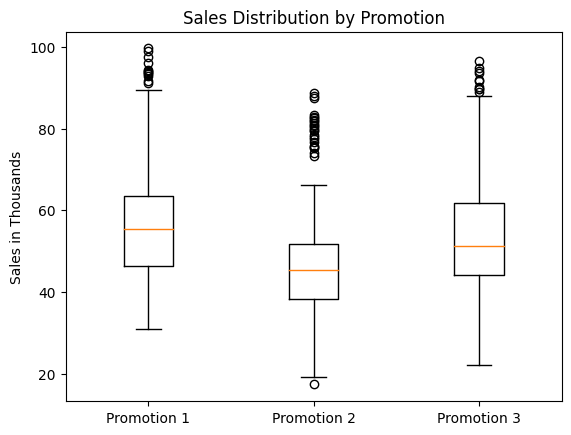

In [ ]:
import matplotlib.pyplot as plt

#plt.boxplot(promotion1['SalesInThousands'])
#plt.show()
sales_data = [promotion1['SalesInThousands'], promotion2['SalesInThousands'], promotion3['SalesInThousands']]

# Create a figure and axis objects
fig, ax = plt.subplots()
ax.boxplot(sales_data, labels=["Promotion 1", "Promotion 2", "Promotion 3"])
ax.set_title('Sales Distribution by Promotion')
ax.set_ylabel('Sales in Thousands')

# Show the plot
plt.show()



**The box plot comparing the three promotions visually confirms the differences in sales performance. Both the visual representation and the statistical analysis are consistent in showing that Promotion 2 has significantly lower average sales compared to Promotions 1 and 3.**

The **Shapiro-Wilk** test checks whether the sales data for each promotion follows a normal distribution.
* If the p-value from the Shapiro-Wilk test is less than 0.05 for a promotion group, it suggests that the data for that group might not be normally distributed. This is important because many statistical tests, like ANOVA, assume normality.

The **Kruskal-Wallis** test compares sales across the three promotions, and a significant p-value would indicate that the sales performance differs across the promotions.
* If the p-value from the Kruskal-Wallis test is less than 0.05, it indicates that there are significant differences in the medians of the "SalesInThousands" distribution across the three promotion groups. This means that the promotions have a different impact on sales.

After finding a significant result in Kruskal-Wallis, the **Tukey Honest Significant Difference (HSD)** test is used for post-hoc comparisons. It helps identify which specific promotion groups differ from each other, providing a more detailed view of where the sales differences lie.
* In Tukey HSD test, a p-adjusted value less than a chosen significance level (commonly 0.05) suggests that the observed effect is statistically significant after accounting for multiple comparisons.


**IN SUMMARY:**
The **Shapiro-Wilk** test assesses whether each promotion's sales data is normally distributed. The **Kruskal-Wallis** test detects if there are significant differences in the overall sales performance across the three promotions. The **Tukey HSD** test pinpoints which specific promotion pairs differ significantly in terms of sales performance.